### Objective: To predict significant variables that help the company business grow

General Observations about the provided data:
 - Data has multiple x variables, hence multiple linear Regression method is chosen
 - Data is supervised(Target Variable is provided)

Steps as follows:
1- Read and understand the Data
2- Train and Test Data
3- Residual Analysis
4- Model Building and cross-check of assumptions
5- Final Prediction 
6- R2 prediction on Test Data

## Import the libraries

In [1183]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings 
warnings.filterwarnings('ignore')

## Read and understand the data¶

In [1184]:
#Read the Day Data set
day=pd.read_csv("D:\LinearRegression Assignement\day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1185]:
#check the head of the data
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1186]:
#check the information of the data
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1187]:
#check the shape for rows and columns
day.shape

(730, 16)

In [1188]:
#chose describe to understand outlier, statistical analysis of data
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1189]:
#Null Values on a whole 

day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No Null/Missing are found

In [1190]:
#Duplicates check
day.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Length: 730, dtype: bool

No Duplicates are found

In [1191]:
# renaming few columns for better readibility

day.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [1192]:
day.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dropping the irrelevant columns that add less value to the current data prediction
 *** Instant- Has only index values
 
 *** dteday- There are pre-existing year and month columns hence this can be deleted
 
 *** casual & registered- There is a new variable 'cnt' which has the count of both the fields, it is not required

In [1193]:
#Drop
day.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

#### Mapping

In [1194]:
#season

day.season = day.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [1195]:
# month
day.month = day.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [1196]:
#weekday

day.weekday = day.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [1197]:
# Eweathersit

day.weathersit = day.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [1198]:
day.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [1199]:
# check the column info of the dataset

day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### Data Visualization

In [1200]:
day.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

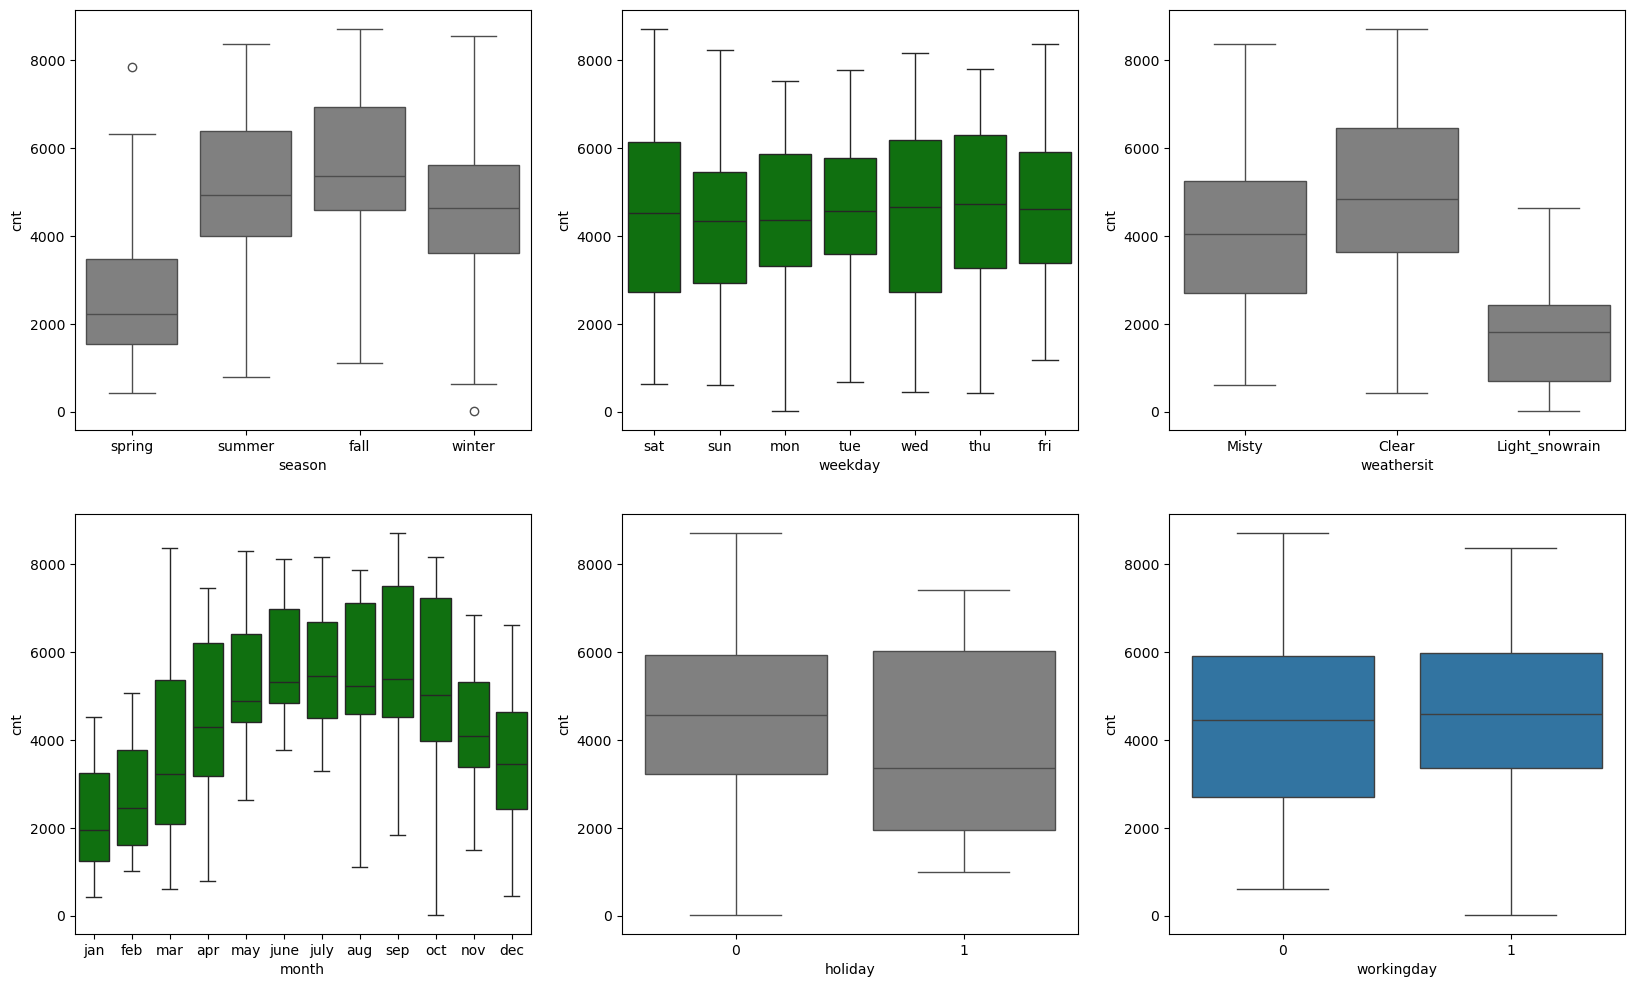

In [1201]:
#plotting the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day,color='grey', order=day.season)
plt.subplot(2,3,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = day, color='green',order=day.weekday)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day, color='grey',order=day.weathersit)
plt.subplot(2,3,4)
sns.boxplot(x = 'month', y = 'cnt', data = day, color='green', order=day.month)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = day, color='grey')
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.show()


 Observations: There are 6 categorical variables

@ Season: the season is a good predictor of the target variable due to its performance over the predicted variable, where the median ranges >5000 for summer & fall

@ mnth: This is another good predictor because most of the months have a median > 5000 and the third quartile seems to be following the trend from April to october

@ weathersit: It is another good predictor with clear showing >5000 median value

@ weekday: It seems to be a good predictor as it shows a pattern of consistency and has a median close to 5000

@ Holiday: Cannot be a good predictor as it shows a negative trend, most of the bookings are happening on non-holiday, so this can be ignored

@ Workingday: Bookings were made mostly on workingday whose range is close to 5000, so it seems to be another good predictor

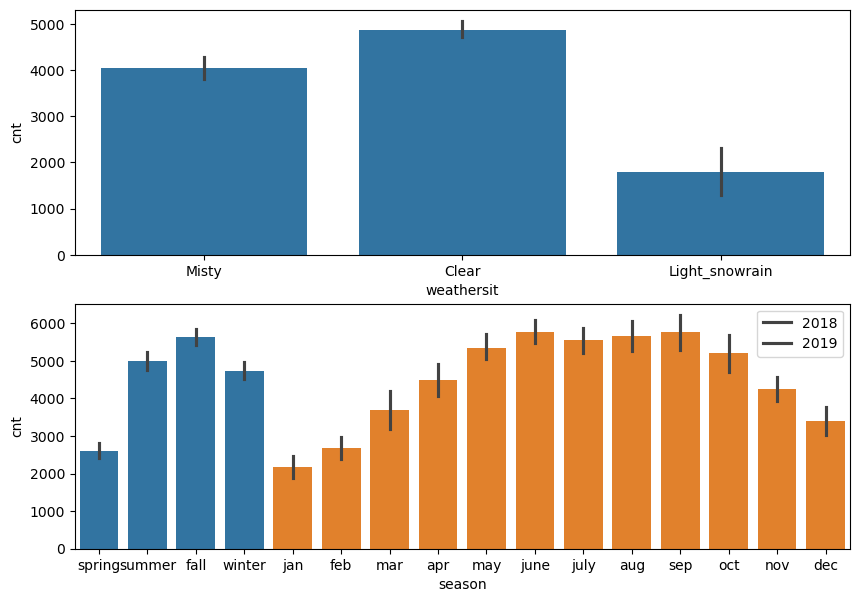

In [1202]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
sns.barplot(x='weathersit', y='cnt', data=day)
plt.subplot(2,1,2)
sns.barplot(x='season',y='cnt',data=day)
plt.legend(labels=['2018', '2019'])

sns.barplot(x='month',y='cnt',data=day)
plt.show()

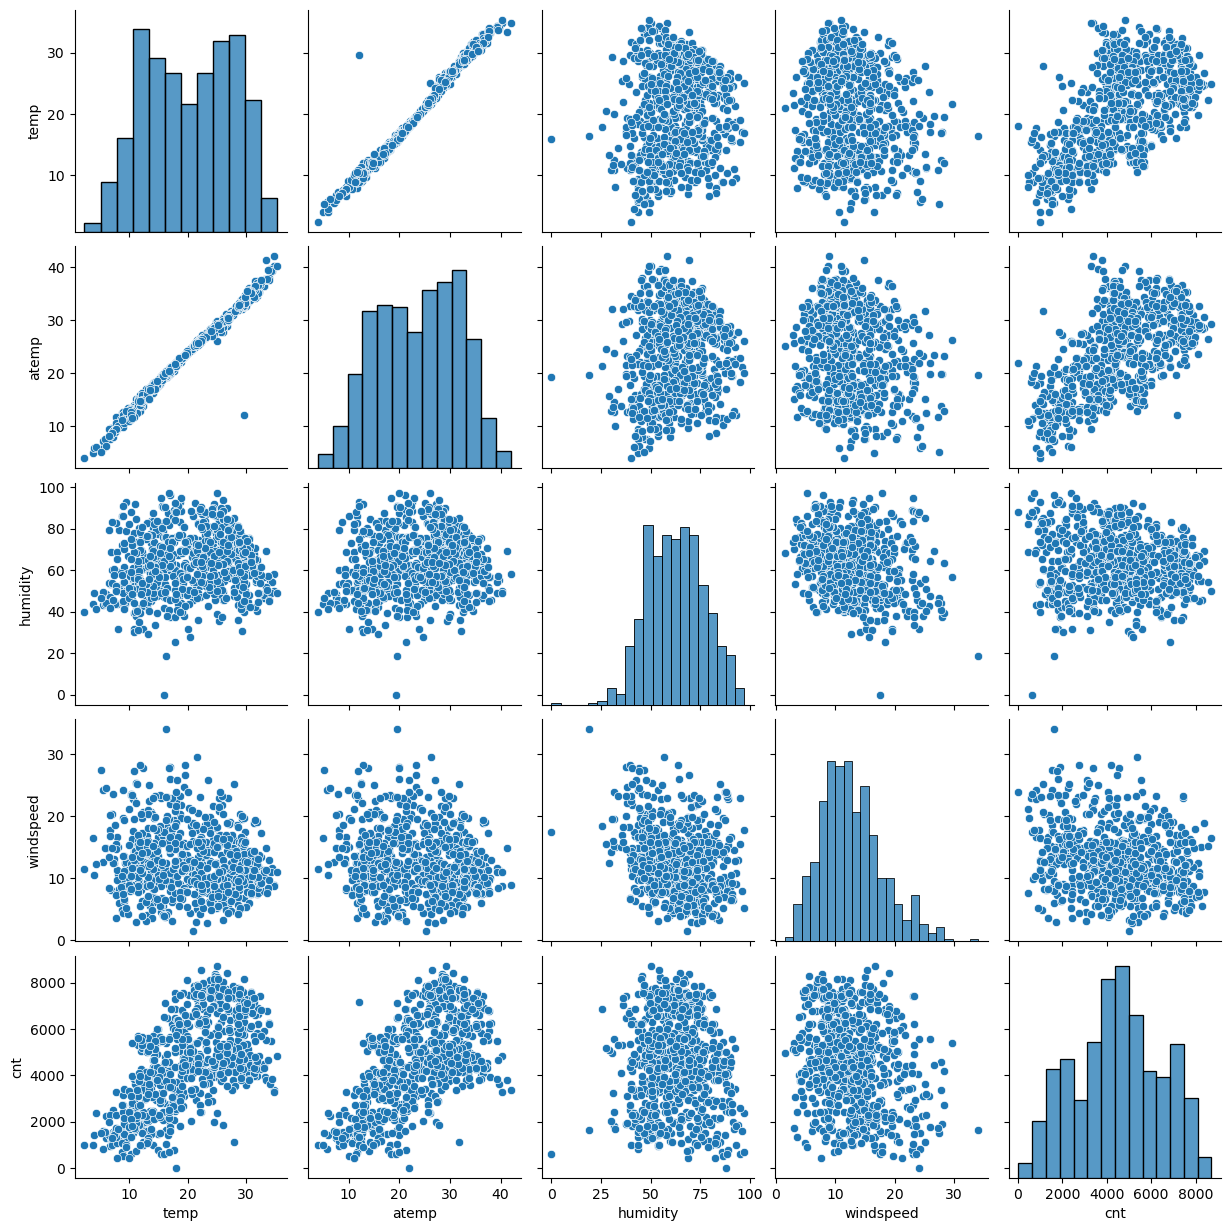

In [1203]:
# New dataframe creation only on numeric variables:

sns.pairplot(data=day,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

From the observations it can be said that temp, atemp  has stronger linear relationship with cnt

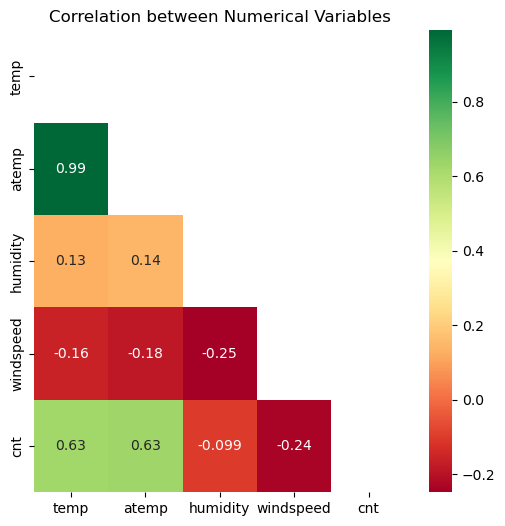

In [1204]:
#correlation coefficients of numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(day[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(day[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

##### Observation: Temp,atemp, have more correlation with the predicted variable cnt which shows signs of multicollinearity

### Data preparation

#### Dummy Variables

Some variables need to be mapped according to the given data, since the regression line needs to be in numeric values, we will map them and convert them into numerical data.

In [1205]:
month_dummies = pd.get_dummies(day['month'], prefix='month', drop_first=True)
weekday_dummies = pd.get_dummies(day['weekday'], prefix='weekday', drop_first=True)
weathersit_dummies = pd.get_dummies(day['weathersit'], prefix='weathersit', drop_first=True)
season_dummies = pd.get_dummies(day['season'], prefix='season', drop_first=True)

In [1206]:
day.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [1207]:
#Merging dataframe with dummy dataset
# Concatenate 
day_new= pd.concat([day, month_dummies, weekday_dummies, weathersit_dummies, season_dummies], axis=1)

In [1208]:
day_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,True,False,False,False,False,False,True,True,False,False
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,False,True,False,False,False,False,True,True,False,False
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,False,False,False,False,False,False,False,True,False,False
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,False,False,False,True,False,False,False,True,False,False
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,True,False,False,True,False,False


In [1209]:
day_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season                     730 non-null    object 
 1   year                       730 non-null    int64  
 2   month                      730 non-null    object 
 3   holiday                    730 non-null    int64  
 4   weekday                    730 non-null    object 
 5   workingday                 730 non-null    int64  
 6   weathersit                 730 non-null    object 
 7   temp                       730 non-null    float64
 8   atemp                      730 non-null    float64
 9   humidity                   730 non-null    float64
 10  windspeed                  730 non-null    float64
 11  cnt                        730 non-null    int64  
 12  month_aug                  730 non-null    bool   
 13  month_dec                  730 non-null    bool   

In [1210]:
# dropping unnecessary columns as we have already created dummy variable out of it.

day_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [1211]:
day_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   humidity                   730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   month_aug                  730 non-null    bool   
 9   month_dec                  730 non-null    bool   
 10  month_feb                  730 non-null    bool   
 11  month_jan                  730 non-null    bool   
 12  month_july                 730 non-null    bool   
 13  month_june                 730 non-null    bool   

In [1212]:
# Define groups of columns
month_columns = ['month_jan','month_feb','month_mar', 'month_may','month_june','month_july','month_aug','month_sep','month_oct','month_nov','month_dec']
weekday_columns = ['weekday_mon','weekday_tue','weekday_wed', 'weekday_thu', 'weekday_sat','weekday_sun']
weathersit_columns = ['weathersit_Misty', 'weathersit_Light_snowrain']
season_columns = ['season_summer', 'season_winter','season_spring']

# Group all column lists together
all_columns = month_columns + weekday_columns + weathersit_columns + season_columns

# Convert the grouped columns to uint8
day_new[all_columns] = day_new[all_columns].astype('uint8')


In [1213]:
day_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [1214]:
# check the shape of new dataframe

day_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   humidity                   730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   month_aug                  730 non-null    uint8  
 9   month_dec                  730 non-null    uint8  
 10  month_feb                  730 non-null    uint8  
 11  month_jan                  730 non-null    uint8  
 12  month_july                 730 non-null    uint8  
 13  month_june                 730 non-null    uint8  

### Split the data(Train,Test split)

In [1215]:
#train,test split
np.random.seed(0)
day_train, day_test = train_test_split(day_new, train_size = 0.70, test_size = 0.30, random_state = 100)

In [1216]:
print(day_train.shape)

print(day_test.shape)


(510, 30)
(219, 30)


In [1217]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

In [1218]:
# verify
day_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0


In [1219]:
from sklearn.preprocessing import MinMaxScaler
num_vars = ['temp','atemp','humidity','windspeed','cnt']
day_train[num_vars] = scaler.fit_transform(day_train[num_vars])

In [1220]:
day_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0


In [1221]:
#Verify the statistical description on minmax scaling
day_train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537262,0.225844,0.0,0.339853,0.540519,0.735215,1.0
atemp,510.0,0.512989,0.212385,0.0,0.332086,0.526811,0.688457,1.0
humidity,510.0,0.650369,0.145882,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320768,0.169797,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513620,0.224593,0.0,0.356420,0.518638,0.684710,1.0
month_aug,510.0,0.096078,0.294988,0.0,0.000000,0.000000,0.000000,1.0
month_dec,510.0,0.084314,0.278131,0.0,0.000000,0.000000,0.000000,1.0


Observation:
We can see MinMax Scaling has been done properly for the Training Data as the Minimum value is 0 for each of the Feature and Maximum value is 1 for each of the Feature

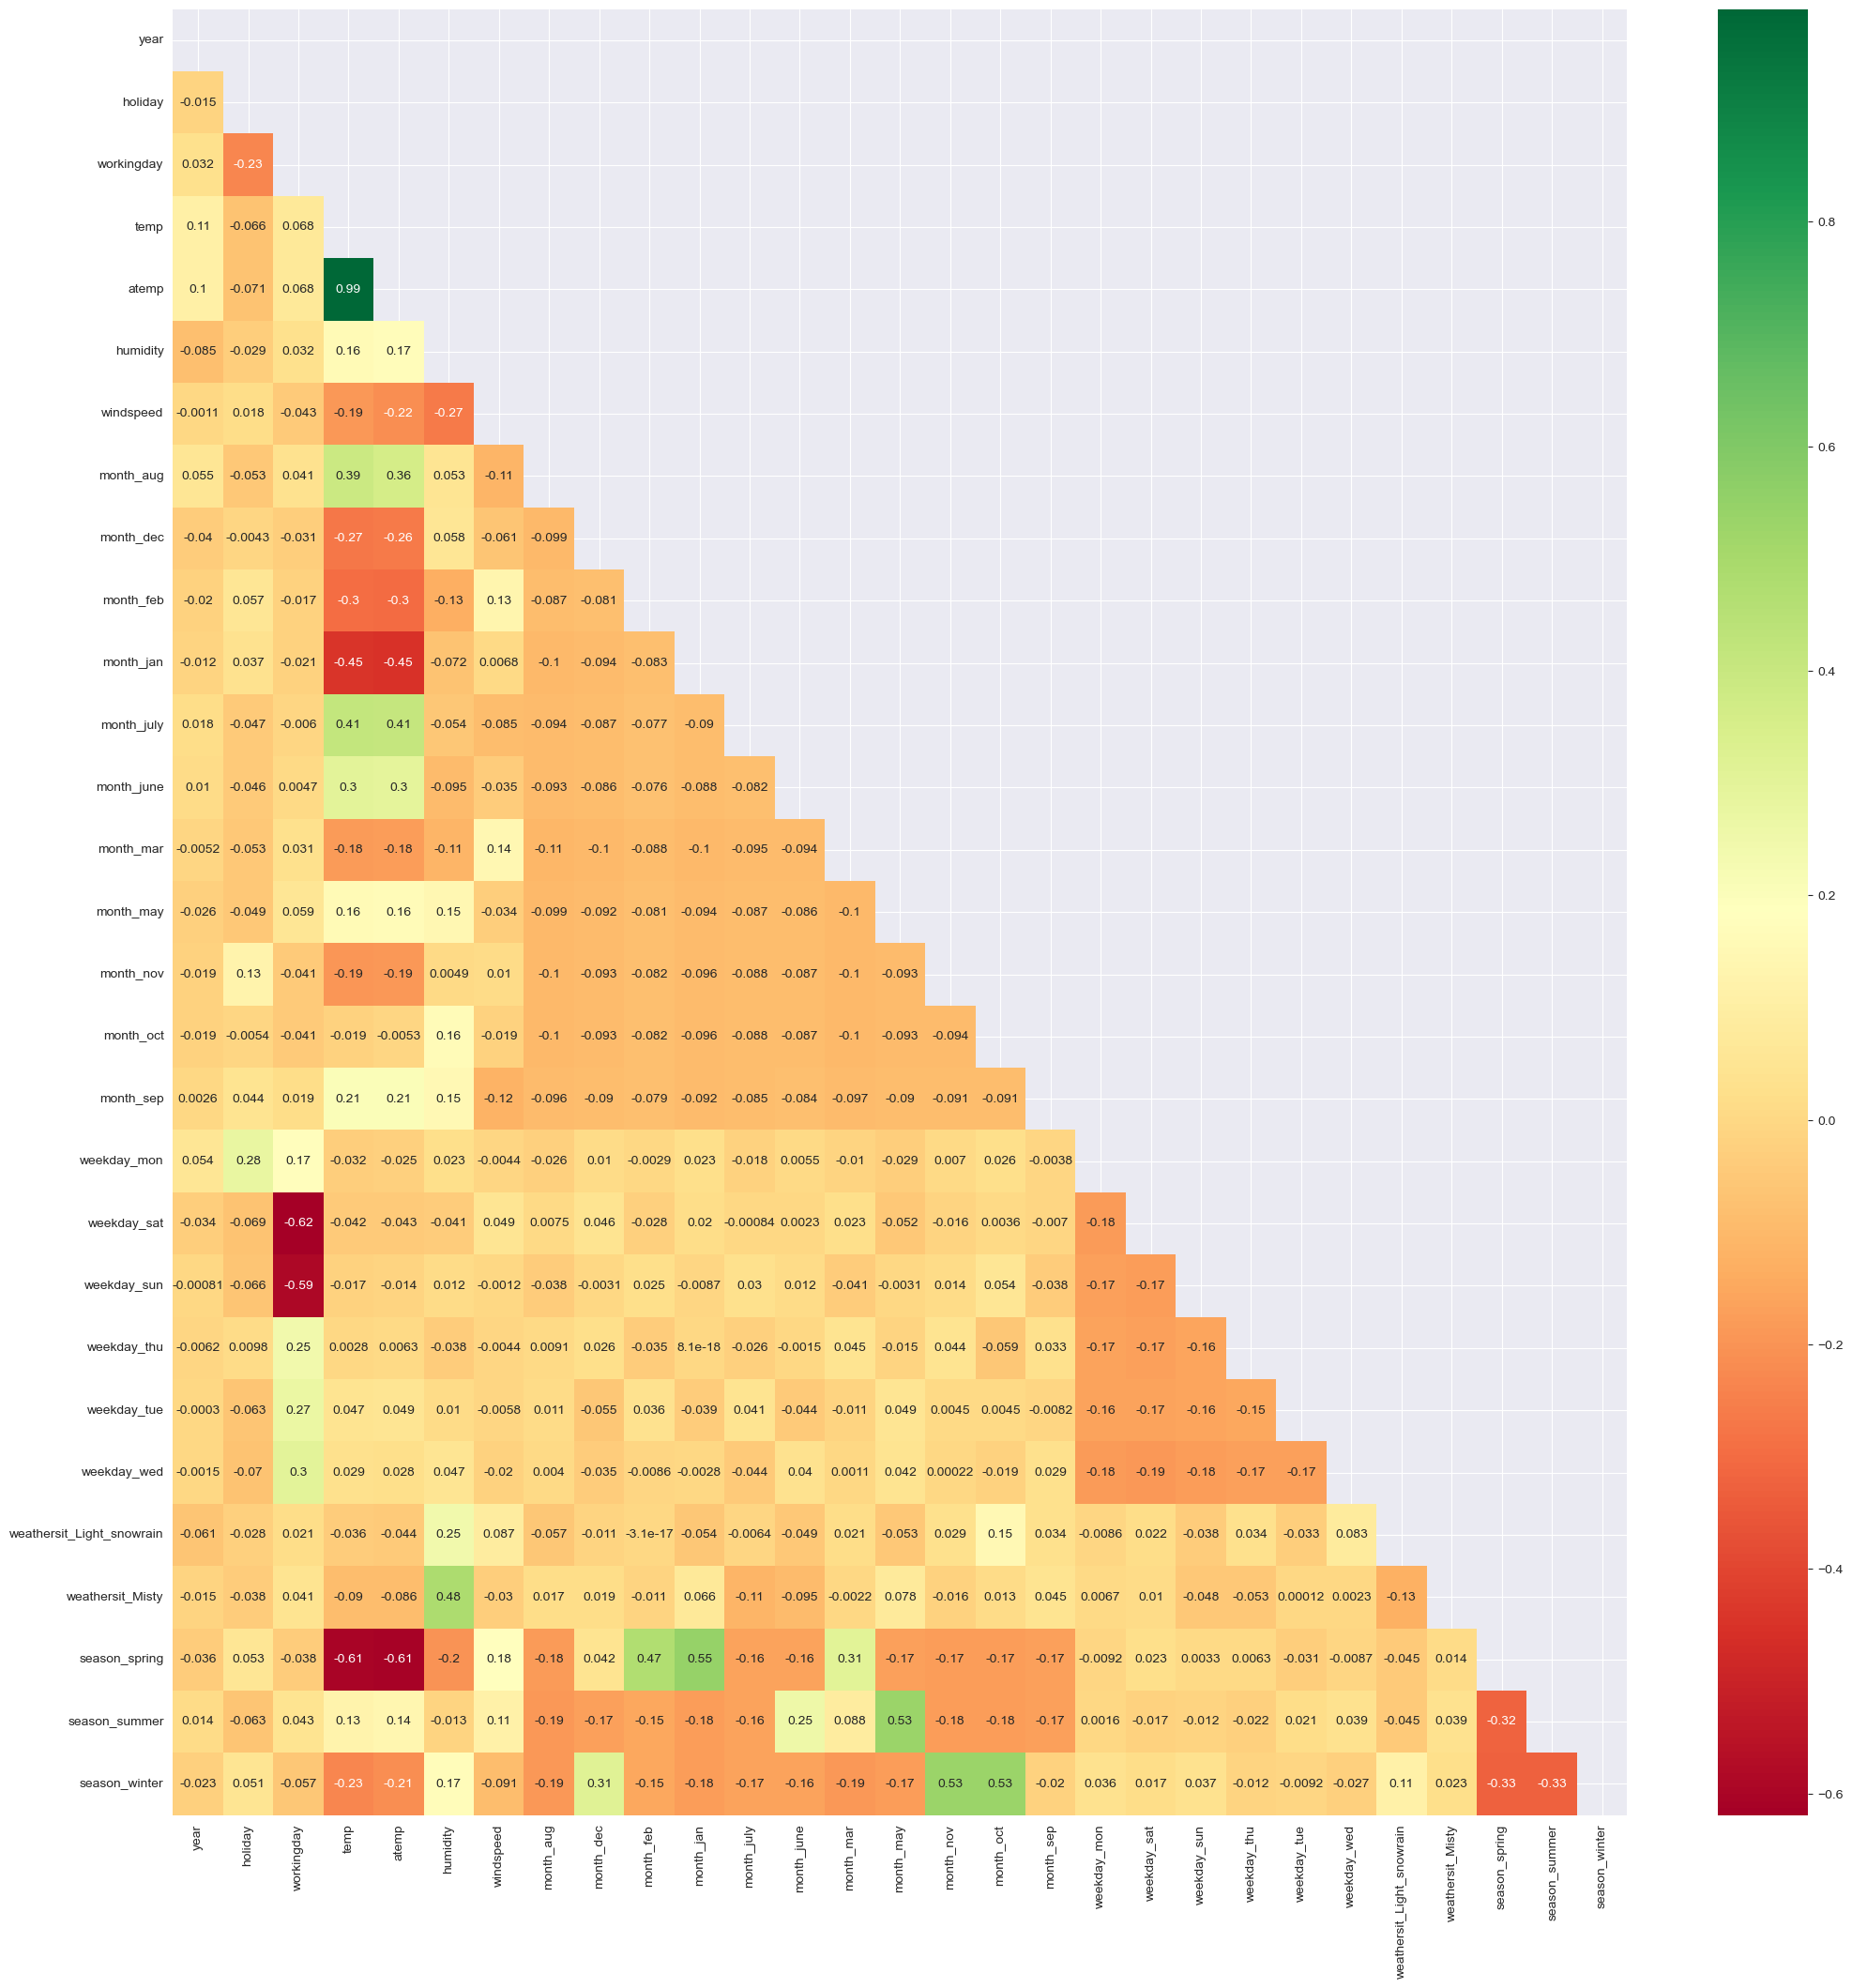

In [1315]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(day_train.corr())
sns.heatmap(day_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

##### cnt seems to have correlation with year variable and temp and summer with may and winter season with oct and Nov

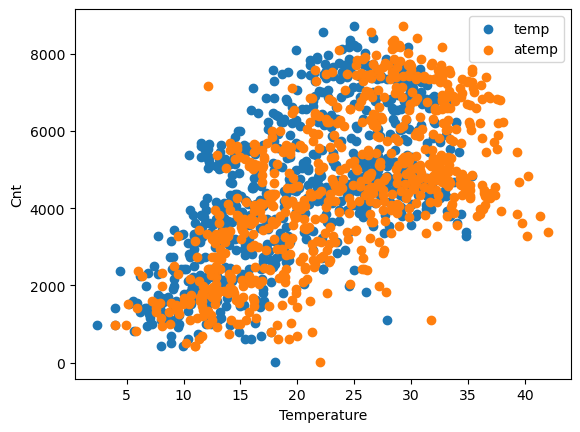

In [1223]:
# Visualizing two of the correlation to see the trends via Scatter plot.

x_values = day[['temp', 'atemp']]  
y_values = day['cnt']

plt.scatter(x=x_values['temp'], y=y_values, label='temp')  # Scatter plot for 'temp' vs 'cnt'
plt.scatter(x=x_values['atemp'], y=y_values, label='atemp')  # Scatter plot for 'atemp' vs 'cnt'

plt.xlabel('Temperature')  # Label for x-axis
plt.ylabel('Cnt')  # Label for y-axis
plt.legend()  # Show legend with labels 'temp' and 'atemp'
plt.show()

### Model Building

In [1224]:
# Preparation of Training Dataset
y_train = day_train.pop('cnt')
X_train = day_train

### RFE(Recursive feature elimination

In [1225]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

# Specify the estimator and number of features to select

rfe = RFE(estimator=lm, n_features_to_select=15)  
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [1226]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('month_aug', False, 8),
 ('month_dec', False, 4),
 ('month_feb', False, 5),
 ('month_jan', False, 2),
 ('month_july', True, 1),
 ('month_june', False, 14),
 ('month_mar', False, 15),
 ('month_may', False, 7),
 ('month_nov', False, 3),
 ('month_oct', False, 11),
 ('month_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1)]

In [1227]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'month_july', 'month_sep', 'weekday_sat', 'weekday_sun',
       'weathersit_Light_snowrain', 'weathersit_Misty', 'season_spring',
       'season_summer', 'season_winter'],
      dtype='object')


In [1228]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['atemp', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_june', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

##### Building Model using statsmodels for the detailed statistics and estimation of VIF

##### VIF

In [1229]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.69
8,weekday_sat,12.20
9,weekday_sun,11.79
12,season_spring,5.02
3,temp,3.62
14,season_winter,3.49
1,holiday,2.91
13,season_summer,2.61
4,humidity,1.91
11,weathersit_Misty,1.57


In [1230]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.13e-191
Time:                        07:03:58   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##### Humidity shows highest VIF value let's drop it

In [1231]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)


##### VIF
 Model 2

In [1232]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,35.88
7,weekday_sat,8.96
8,weekday_sun,8.41
11,season_spring,4.96
3,temp,3.38
13,season_winter,3.36
12,season_summer,2.59
1,holiday,2.34
5,month_july,1.48
6,month_sep,1.29


In [1233]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

#Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.73e-189
Time:                        07:03:58   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##### VIF
Model 3

In [1234]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['weekday_sun','humidity'], axis = 1)

In [1235]:
# VIF Check
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
10,season_spring,2.49
11,season_summer,2.32
0,year,2.07
12,season_winter,1.99
7,weekday_sat,1.96
5,month_july,1.58
9,weathersit_Misty,1.56


In [1236]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

#Summary
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.73e-189
Time:                        07:03:58   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##### Model4
Let's drop Holiday.'

In [1237]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)

In [1238]:
# VIF Check
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
9,season_spring,2.38
10,season_summer,2.31
0,year,2.07
11,season_winter,1.92
6,weekday_sat,1.83
4,month_july,1.58
8,weathersit_Misty,1.56


In [1239]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm3).fit()

#check summary
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.73e-189
Time:                        07:04:00   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [1240]:
#check summary
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.73e-189
Time:                        07:04:00   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##### Model 5
Dropping windspeed as it has high VIF

In [1241]:
X_train_new = X_train_new.drop(["windspeed"], axis = 1)

In [1242]:
#VIF check
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.03
1,workingday,4.63
0,year,2.07
9,season_summer,2.05
5,weekday_sat,1.81
8,season_spring,1.78
10,season_winter,1.74
3,month_july,1.58
7,weathersit_Misty,1.56
4,month_sep,1.34


In [1243]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

#check summary
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          9.28e-183
Time:                        07:04:01   Log-Likelihood:                 488.32
No. Observations:                 510   AIC:                            -952.6
Df Residuals:                     498   BIC:                            -901.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

######  Model 6

Dropping month_july

In [1244]:
X_train_new=X_train_new.drop(['month_july'],axis=1)

In [1245]:
#VIF Check

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.72
1,workingday,4.63
0,year,2.07
4,weekday_sat,1.81
8,season_summer,1.74
7,season_spring,1.70
9,season_winter,1.59
6,weathersit_Misty,1.56
3,month_sep,1.23
5,weathersit_Light_snowrain,1.07


In [1246]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

#check summary
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.55e-182
Time:                        07:04:03   Log-Likelihood:                 484.95
No. Observations:                 510   AIC:                            -947.9
Df Residuals:                     499   BIC:                            -901.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [1247]:
# Final VIFs 
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.72
1,workingday,4.63
0,year,2.07
4,weekday_sat,1.81
8,season_summer,1.74
7,season_spring,1.70
9,season_winter,1.59
6,weathersit_Misty,1.56
3,month_sep,1.23
5,weathersit_Light_snowrain,1.07


###### 

observation- Final Model
 
@@ We have Prob( F-Statistic) value of 237.5 (which is greater than 1) and the p-value of 1.55e-182 i.e almost equals to zero, states that the overall model is significant

@@ We got quite Good Adjusted R2 Score "82.6%"
 
@@ p-values for all the predictors are (<0.05) which makes model significant

@@ For now current model is considered a good fit for t
    the  prediction

In [1250]:
# Checking the parameters and their coefficient values
lr6.params

const                        0.090128
year                         0.233279
workingday                   0.056768
temp                         0.491799
month_sep                    0.091524
weekday_sat                  0.064724
weathersit_Light_snowrain   -0.305050
weathersit_Misty            -0.079959
season_spring               -0.064667
season_summer                0.051613
season_winter                0.098360
dtype: float64

#### #### The equation of best fitted surface based on model lr6:
ta
cnt = 0.084143 + (yr × 0.230846) + (workingday × 0.043203) + (temp × 0.563615) − (windspeed × 0.155191) + (season2 × 0.082706) + (season4 ×0.128744) + (mnth9 × 0.094743) + (weekday6 ×0.056909) − (weathersit2 × 0.074807) − (weathersit3 × 0.306992)

### Residual Analysis

In [1253]:
# Calculation of Error in Prediction for Training Data
X_train_lm6

,const,year,workingday,temp,month_sep,weekday_sat,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
653,1.0,1,1,0.509887,0,0,0,0,0,0,1
576,1.0,1,1,0.815169,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0,1,0,1,1,0,0
728,1.0,1,0,0.245101,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,1,0.824514,0,0,0,1,0,1,0
578,1.0,1,1,0.863973,0,0,0,0,0,0,0
53,1.0,0,1,0.202618,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0,1,0,1,0,0,1


In [1257]:
y_train_pred=lr6.predict(X_train_lm6)

## Assumptions
### Normality

Text(0.5, 0, 'Errors')

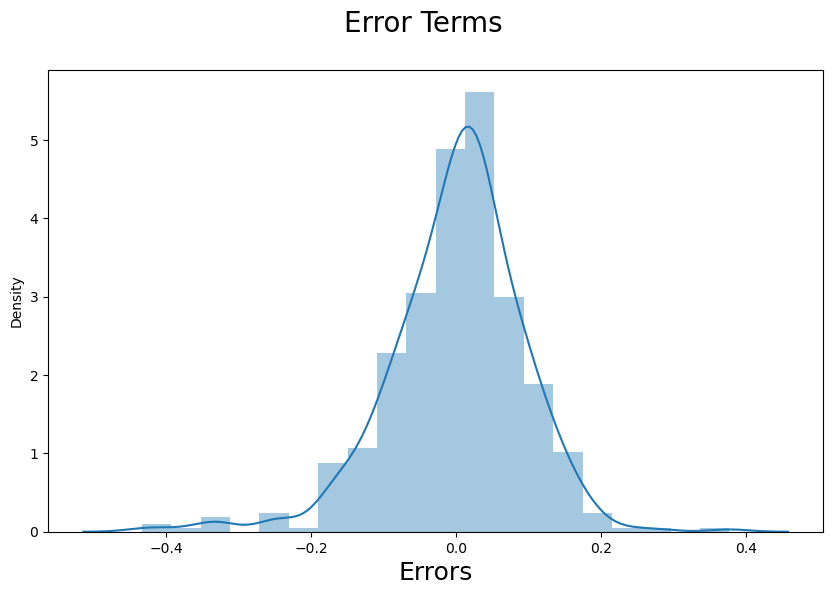

In [1258]:
# Ploting of Residuals
fig = plt.figure(figsize=(10,6))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

#####         We can see Error Terms are normally Distributed with mean Zero. Hence Model is Actaully obeying the assumption of Normality.

### Multicollinearity

In [1260]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.72
1,workingday,4.63
0,year,2.07
4,weekday_sat,1.81
8,season_summer,1.74
7,season_spring,1.70
9,season_winter,1.59
6,weathersit_Misty,1.56
3,month_sep,1.23
5,weathersit_Light_snowrain,1.07


##### There is no multicollinearity existing between the predictor variables, as all the values are within the permissible range of below 5

### Patterns

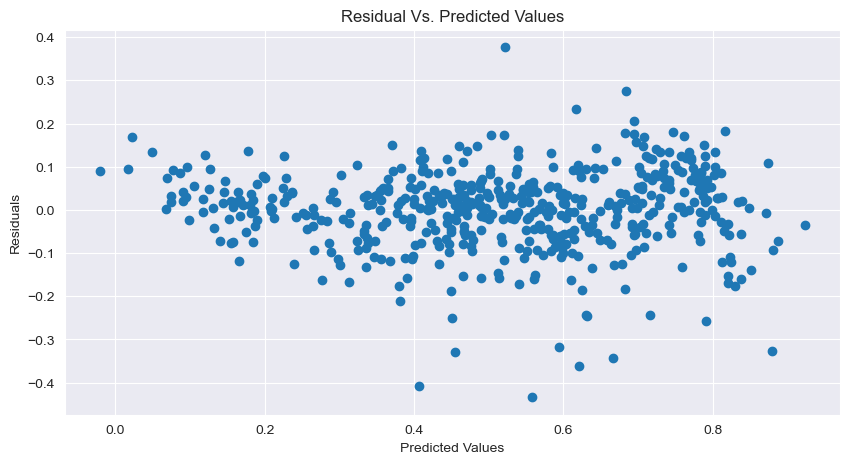

In [1274]:
y_train_pred = lr6.predict(X_train_lm6)
res= y_train - y_train_pred

plt.figure(figsize = (10,5))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

####### We can see there is no specific Pattern observed in the Error Terms with respect to Prediction, hence we can say Error terms are independent of each other.


###### From above pair plots we have also proved the linearity relationship between variables


#### Constant Variance

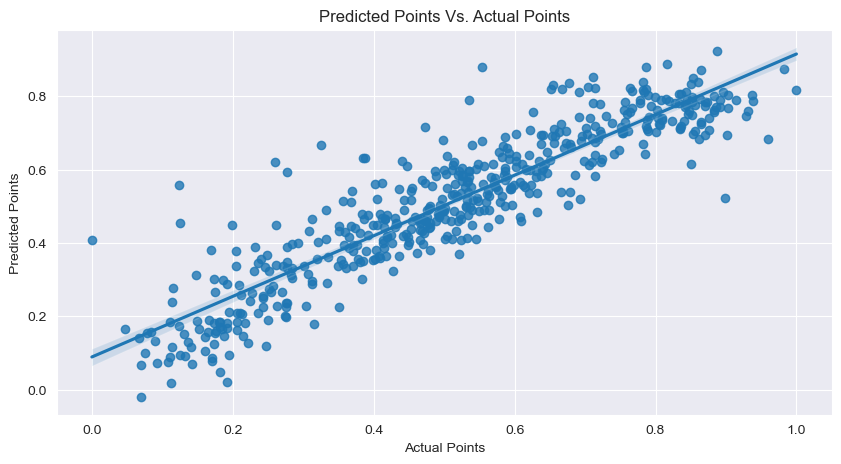

In [1270]:
plt.figure(figsize = (10,5))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

##### We can see Error Terms have approximatly a Constant Variance, Hence it follows the Assumption of Homoscedasticity



### Predictions Evaluation based on Final Model


In [1276]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
day_test[num_vars] = scaler.transform(day_test[num_vars])
day_test.head()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [1278]:
day_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,...,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,...,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1281]:
y_test = day_test.pop('cnt')
X_test = day_test

In [1282]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

In [1286]:
y_test_pred = lr6.predict(X_test_lm6)

### R^2 Value for TEST & Train

In [1306]:
#Test
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_pred)
round(r2,2)

0.81

In [1308]:
from sklearn.metrics import r2_score
#Train
r2=r2_score(y_train, y_train_pred)
round(r2,2)

0.83

### Model Evaluation

# Plotting y_test and y_pred to understand the spread= 16) 

Text(0, 0.5, 'y_pred')

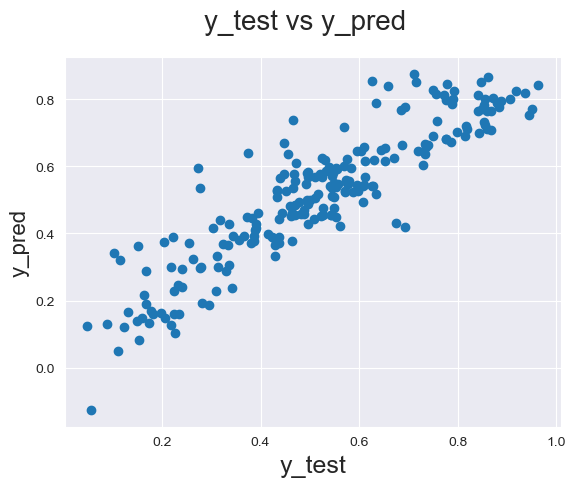

In [1298]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [1300]:
round(lr6.params,4)

const                        0.0901
year                         0.2333
workingday                   0.0568
temp                         0.4918
month_sep                    0.0915
weekday_sat                  0.0647
weathersit_Light_snowrain   -0.3051
weathersit_Misty            -0.0800
season_spring               -0.0647
season_summer                0.0516
season_winter                0.0984
dtype: float64

##### Best Fitted line is as observed as below
cnt=0.0901+0.2333*year+0.0568*workingday+0.4918*temp+0.0915*month_sep+0.0647*weekday_sat-0.3051*weathersit_Light_snowrain-0.0800*weathersit_Misty-0.0647*season_spring+0.0516*
season_summe+0.0984* season_winter              

In [1311]:
# Calculating Adjusted-R^2 for the test dataset
#test
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(round(adjusted_r2,2))

0.82


In [1314]:
#train
adjusted_r2 = round(1-(1-r2)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),4)
print(adjusted_r2)

0.8159


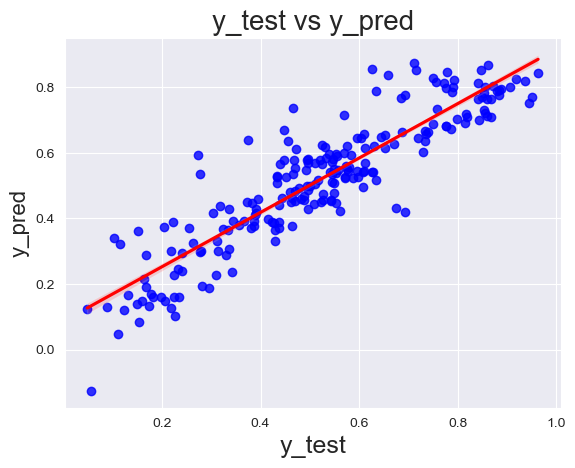

In [1302]:
# Visualizing the fit on the test data using Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

#### Comparision
@@ Train dataset R^2          : 0.83

@@  Test dataset R^2          : 0.1

@@ Train dataset Adjusted R^2 :  0.8159 
 
@@ Test dataset Adjusted R^2  :  0.82944


### Conclusion

In [ ]:
##### As per our final Model, the top 3 predictor variables that influence the bike booking are:

#### Temperature (temp) 

#### Weather Situation 3 (weathersit_3) 

#### year(yr)

#### *** It is interesting to note that Saturday People like to Rent a Bike more on Saturdays than on usual days.